<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файлов-и-предобработка-данных" data-toc-modified-id="Изучение-данных-из-файлов-и-предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файлов и предобработка данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

Нам предоставлены данные компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Данные представлены в 5 таблицах: users (информация о пользователях), calls (информация о звонках), messages (информация о сообщениях), internet (информация об интернет-сессиях), tariffs (информация о тарифах). Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файлов и предобработка данных

Последовательно изучим информацию из каждого файла и проведем предобработку данных

In [1]:
import pandas as pd
import numpy as np

In [2]:
from scipy import stats as st
calls = pd.read_csv('/datasets/calls.csv')
display(calls.head(15))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Файл с информацией о звнках содержит 4 столбца и 202607 строк с разными типами данных. Исходя из общей информации о файле в столбах 'call_date' и 'duration' не подходящие типы данных, поменяем их, а также проверим на наличие пропусков таблицу

In [4]:
calls_passes = calls.isna().sum() # проверяем пропуски в файле 
print(calls_passes)

id           0
call_date    0
duration     0
user_id      0
dtype: int64


In [5]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%dT%H:%M:%S')

In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [7]:
calls['duration'] = np.ceil(calls['duration'])
calls = calls.astype({"duration":'int64'})
display(calls.head(10))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
7,1000_7,2018-08-22,19,1000
8,1000_8,2018-09-15,19,1000
9,1000_9,2018-08-15,0,1000


In [8]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month # добавим столбец с номер месяца для дальнейшего анализа 
display(calls.head(15))

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
5,1000_5,2018-11-02,0,1000,11
6,1000_6,2018-10-18,0,1000,10
7,1000_7,2018-08-22,19,1000,8
8,1000_8,2018-09-15,19,1000,9
9,1000_9,2018-08-15,0,1000,8


In [9]:
internet = pd.read_csv('/datasets/internet.csv', index_col=0)
display(internet.head(15))

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


Файл с информацией о трафике в интернете содержит 5 столбцов и 149396 строк с разными типами данных. Исходя из общей информации о файле в столбах 'session_date' и 'mb_used' не подходящие типы данных, поменяем их, а также проверим на наличие пропусков таблицу

In [11]:
internet_passes = internet.isna().sum()
print(internet_passes)

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64


In [12]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%dT%H:%M:%S')

In [13]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


In [14]:
internet = internet.astype({"mb_used":'int64'}) # изменяю тип данных в нужных столбцах
display(internet.head(10))

,id,mb_used,session_date,user_id
0,1000_0,112,2018-11-25,1000
1,1000_1,1052,2018-09-07,1000
2,1000_2,1197,2018-06-25,1000
3,1000_3,550,2018-08-22,1000
4,1000_4,302,2018-09-24,1000
5,1000_5,399,2018-10-02,1000
6,1000_6,540,2018-09-07,1000
7,1000_7,415,2018-07-11,1000
8,1000_8,505,2018-10-08,1000
9,1000_9,345,2018-09-03,1000


In [15]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
display(internet.head(15))

,id,mb_used,session_date,user_id,month
0,1000_0,112,2018-11-25,1000,11
1,1000_1,1052,2018-09-07,1000,9
2,1000_2,1197,2018-06-25,1000,6
3,1000_3,550,2018-08-22,1000,8
4,1000_4,302,2018-09-24,1000,9
5,1000_5,399,2018-10-02,1000,10
6,1000_6,540,2018-09-07,1000,9
7,1000_7,415,2018-07-11,1000,7
8,1000_8,505,2018-10-08,1000,10
9,1000_9,345,2018-09-03,1000,9


In [16]:
messages = pd.read_csv('/datasets/messages.csv')
display(messages.head(15))

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [17]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Файл с информацией о сообщениях содержит 3 столбца и 123036 строк с разными типами данных. Исходя из общей информации о файле в столбе 'message_date' не подходящие типы данных, поменяем их, а также проверим на наличие пропусков таблицу

In [18]:
messages_passes = messages.isna().sum()
print(messages_passes)

id              0
message_date    0
user_id         0
dtype: int64


In [19]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%dT%H:%M:%S')

In [20]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [21]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
display(messages.head(15))

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
5,1000_5,2018-06-20,1000,6
6,1000_6,2018-11-19,1000,11
7,1000_7,2018-10-29,1000,10
8,1000_8,2018-06-25,1000,6
9,1000_9,2018-12-18,1000,12


In [22]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
display(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [23]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Файл с информацией о тарифах содержит 8 столбцов и 2 строки с разными типами данных. Проверим на наличие пропусков таблицу

In [24]:
tariffs_passes = tariffs.isna().sum()
print(tariffs_passes)

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64


In [25]:
users = pd.read_csv('/datasets/users.csv')
display(users.head(15))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [26]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Файл с информацией о пользователях содержит 8 столбцов и 500 строк с разными типами данных. Исходя из общей информации о файле в столбах 'reg_date' и 'churn_date' не подходящие типы данных, поменяем их, а также проверим на наличие пропусков таблицу

In [27]:
users_passes = users.isna().sum()
print(users_passes)

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64


In [28]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%dT%H:%M:%S')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%dT%H:%M:%S')

In [29]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


**Вывод**

Удалось обнаружить и устранить имеющиеся проблемы в данных

## Подготовка данных

Посчитайте для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-- - трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

И объединим несколько таблиц в единый датафрейм

In [30]:
calls.columns = ['id', 'date', 'duration', 'user_id', 'month'] # Переименуем столбцы в таблицах для единообразия
internet.columns = ['id', 'mb_used', 'date', 'user_id', 'month']

In [31]:
calls_pivot = calls.pivot_table(index=["user_id", "month"], values='duration', aggfunc=['count','sum']) # сделаем сводную таблицу для подсчета количества сделанных звонков и израсходованных минут разговора по месяцам 
calls_pivot.columns = ['count_calls', 'sum_calls'] # переименуем столбцы для удобства
display(calls_pivot.head(10))

count_calls  sum_calls
user_id month                        
1000    5               22        159
        6               43        172
        7               47        340
        8               52        408
        9               58        466
        10              57        350
        11              43        338
        12              46        333
1001    11              59        430
        12              63        414

In [32]:
internet_pivot = internet.pivot_table(index=["user_id", "month"], values='mb_used', aggfunc=['count','sum']) # сделаем сводную таблицу для подсчета количества объема израсходованного интернет-трафика по месяцам
internet_pivot.columns = ['count_internet', 'sum_internet'] # переименуем столбцы для удобства
display(internet_pivot.head(10))

count_internet  sum_internet
user_id month                              
1000    5                   5          2252
        6                  49         23213
        7                  29         13988
        8                  29         14043
        9                  27         14556
        10                 27         14690
        11                 24         14745
        12                 21          9808
1001    11                 55         18405
        12                 41         14018

In [33]:
internet_pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3203 entries, (1000, 5) to (1499, 12)
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   count_internet  3203 non-null   int64
 1   sum_internet    3203 non-null   int64
dtypes: int64(2)
memory usage: 63.5 KB


In [34]:
data = calls_pivot.merge(internet_pivot, on=['user_id', 'month'], how='outer') # объединим таблицы в одну
display(data)

count_calls  sum_calls  count_internet  sum_internet
user_id month                                                      
1000    5             22.0      159.0             5.0        2252.0
        6             43.0      172.0            49.0       23213.0
        7             47.0      340.0            29.0       13988.0
        8             52.0      408.0            29.0       14043.0
        9             58.0      466.0            27.0       14556.0
...                    ...        ...             ...           ...
1489    8              NaN        NaN            34.0       11038.0
        9              NaN        NaN            63.0       17183.0
        10             NaN        NaN            63.0       19538.0
        11             NaN        NaN            55.0       17471.0
        12             NaN        NaN            51.0       17298.0

[3214 rows x 4 columns]

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1489, 12)
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   count_calls     3174 non-null   float64
 1   sum_calls       3174 non-null   float64
 2   count_internet  3203 non-null   float64
 3   sum_internet    3203 non-null   float64
dtypes: float64(4)
memory usage: 130.4 KB


In [36]:
messages.columns = ['id', 'date', 'user_id', 'month'] # Переименуем столбцы в таблицах для единообразия

In [37]:
messages_pivot = messages.pivot_table(index=["user_id", "month"], values='id', aggfunc=['count']) # сделаем сводную таблицу для подсчета количества отправленных сообщений по месяцам
messages_pivot.columns = ['count_messages'] # переименуем столбцы для удобства
display(messages_pivot.head(10))

count_messages
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
        10                 73
        11                 58
        12                 70
1002    6                   4
        7                  11

In [38]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   id       123036 non-null  object        
 1   date     123036 non-null  datetime64[ns]
 2   user_id  123036 non-null  int64         
 3   month    123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


In [39]:
data = data.merge(messages_pivot, on=['user_id', 'month'], how='outer') # объединим таблицы в одну
display(data)

count_calls  sum_calls  count_internet  sum_internet  \
user_id month                                                         
1000    5             22.0      159.0             5.0        2252.0   
        6             43.0      172.0            49.0       23213.0   
        7             47.0      340.0            29.0       13988.0   
        8             52.0      408.0            29.0       14043.0   
        9             58.0      466.0            27.0       14556.0   
...                    ...        ...             ...           ...   
1489    8              NaN        NaN            34.0       11038.0   
        9              NaN        NaN            63.0       17183.0   
        10             NaN        NaN            63.0       19538.0   
        11             NaN        NaN            55.0       17471.0   
        12             NaN        NaN            51.0       17298.0   

               count_messages  
user_id month                  
1000    5                22.0  
        6                60.0  
        7                75.0  
        8                81.0  
        9                57.0  
...                       ...  
1489    8                17.0  
        9                32.0  
        10               21.0  
        11               20.0  
        12               35.0  

[3214 rows x 5 columns]

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1489, 12)
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   count_calls     3174 non-null   float64
 1   sum_calls       3174 non-null   float64
 2   count_internet  3203 non-null   float64
 3   sum_internet    3203 non-null   float64
 4   count_messages  2717 non-null   float64
dtypes: float64(5)
memory usage: 155.5 KB


In [41]:
data.duplicated().sum() # проверим дубликаты

0

Заполним пропуски в нужных столбцах 0, так как если значения в данном столбце нет, значит услуга пользователем в этот период не использовалась  

In [42]:
data['count_calls'] = data['count_calls'].fillna(0)
data['sum_calls'] = data['sum_calls'].fillna(0)
data['count_internet'] = data['count_internet'].fillna(0)
data['sum_internet'] = data['sum_internet'].fillna(0)
data['count_messages'] = data['count_messages'].fillna(0)

In [43]:
data = data.astype({"count_calls":'int64', "sum_calls":'Int64', "count_internet":'Int64', "sum_internet":'Int64', "count_messages":'Int64'}) # изменяю тип данных в нужных столбцах
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1489, 12)
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   count_calls     3214 non-null   int64
 1   sum_calls       3214 non-null   Int64
 2   count_internet  3214 non-null   Int64
 3   sum_internet    3214 non-null   Int64
 4   count_messages  3214 non-null   Int64
dtypes: Int64(4), int64(1)
memory usage: 168.1 KB


In [44]:
display(data)

count_calls  sum_calls  count_internet  sum_internet  \
user_id month                                                         
1000    5               22        159               5          2252   
        6               43        172              49         23213   
        7               47        340              29         13988   
        8               52        408              29         14043   
        9               58        466              27         14556   
...                    ...        ...             ...           ...   
1489    8                0          0              34         11038   
        9                0          0              63         17183   
        10               0          0              63         19538   
        11               0          0              55         17471   
        12               0          0              51         17298   

               count_messages  
user_id month                  
1000    5                  22  
        6                  60  
        7                  75  
        8                  81  
        9                  57  
...                       ...  
1489    8                  17  
        9                  32  
        10                 21  
        11                 20  
        12                 35  

[3214 rows x 5 columns]

In [45]:
data = data.reset_index() # перед дальнейшим объединением очистим индексы
display(data)

,user_id,month,count_calls,sum_calls,count_internet,sum_internet,count_messages
0,1000,5,22,159,5,2252,22
1,1000,6,43,172,49,23213,60
2,1000,7,47,340,29,13988,75
3,1000,8,52,408,29,14043,81
4,1000,9,58,466,27,14556,57
...,...,...,...,...,...,...,...
3209,1489,8,0,0,34,11038,17
3210,1489,9,0,0,63,17183,32
3211,1489,10,0,0,63,19538,21
3212,1489,11,0,0,55,17471,20


Объединим таблицы с информацией о тарифах и пользователях в одну

In [46]:
tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff']
users = users.merge(tariffs, on=['tariff'], how='outer')
users = users.reset_index()
display(users)

,index,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
2,2,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30720,3000,1950,150,1,1
3,3,1013,36,NaT,Иваново,Борис,Андреенко,2018-11-14,ultra,1000,30720,3000,1950,150,1,1
4,4,1016,58,NaT,Омск,Марица,Сазонова,2018-11-21,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,1494,62,NaT,Омск,Ренат,Андропов,2018-08-17,smart,50,15360,500,550,200,3,3
496,496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,50,15360,500,550,200,3,3
497,497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,50,15360,500,550,200,3,3
498,498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3


Сделаем единый датафрейм

In [47]:
data = data.merge(users, on=['user_id'], how='outer')
display(data)

,user_id,month,count_calls,sum_calls,count_internet,sum_internet,count_messages,index,age,churn_date,...,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22.0,159,5,2252,22,0,52,NaT,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,43.0,172,49,23213,60,0,52,NaT,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,47.0,340,29,13988,75,0,52,NaT,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,52.0,408,29,14043,81,0,52,NaT,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,58.0,466,27,14556,57,0,52,NaT,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10.0,0.0,0,63,19538,21,492,35,NaT,...,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,11.0,0.0,0,55,17471,20,492,35,NaT,...,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3213,1489,12.0,0.0,0,51,17298,35,492,35,NaT,...,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3214,1128,NaN,NaN,<NA>,<NA>,<NA>,<NA>,36,51,2018-12-23,...,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   month                  3214 non-null   float64       
 2   count_calls            3214 non-null   float64       
 3   sum_calls              3214 non-null   Int64         
 4   count_internet         3214 non-null   Int64         
 5   sum_internet           3214 non-null   Int64         
 6   count_messages         3214 non-null   Int64         
 7   index                  3216 non-null   int64         
 8   age                    3216 non-null   int64         
 9   churn_date             189 non-null    datetime64[ns]
 10  city                   3216 non-null   object        
 11  first_name             3216 non-null   object        
 12  last_name              3216 non-null   object        
 13  reg

In [49]:
number_of_passes = data.isna().sum()
print(number_of_passes)

user_id                     0
month                       2
count_calls                 2
sum_calls                   2
count_internet              2
sum_internet                2
count_messages              2
index                       0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64


In [50]:
data = data.dropna(subset=['sum_calls']) # удалим 2 пустые строки, появившиеся при объединении
display(data)

,user_id,month,count_calls,sum_calls,count_internet,sum_internet,count_messages,index,age,churn_date,...,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22.0,159,5,2252,22,0,52,NaT,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,43.0,172,49,23213,60,0,52,NaT,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,47.0,340,29,13988,75,0,52,NaT,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,52.0,408,29,14043,81,0,52,NaT,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,58.0,466,27,14556,57,0,52,NaT,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8.0,0.0,0,34,11038,17,492,35,NaT,...,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3210,1489,9.0,0.0,0,63,17183,32,492,35,NaT,...,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3211,1489,10.0,0.0,0,63,19538,21,492,35,NaT,...,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,11.0,0.0,0,55,17471,20,492,35,NaT,...,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3


Почтитаем помесячную выручку с каждого пользователя
Выручка это абонентская плата + стоимость перерасходов
Стоимость перерасходов это стоимость минут сверх лимита + стоимость смс сверх лимита + стоимость интернета сверх лимита
В случае если абонент не расходовал сверх лимита, выручка = абонентская плата
для остальных случаев - необходимо прибавить к абонентской плате стоимость перерасходов
Стоимость перерасходов:
для звонков -  дельта sum_calls и minutes_included * тариф за минуту rub_per_minute 
для смс - дельта count_messages и messages_included  * тариф за смс rub_per_message
для интернета - дельта sum_internet и mb_per_month_included  переведенная в Гби округленная вверх до целого числа * на тариф за Гб rub_per_gb  
Реализовуем это в коде с помощью функции:

In [51]:
def income_count(data):
    '''
    Функция для расчета выручки
    
    '''
    user = data['user_id']
    delta_calls = data['sum_calls'] - data['minutes_included']
    delta_internet = data['sum_internet'] - data['mb_per_month_included']
    delta_messages = data['count_messages'] - data['messages_included']
    if delta_calls <= 0 and delta_internet <= 0 and delta_messages <= 0:
        return data['rub_monthly_fee']
    else:
        call = 0
        inet = 0
        mess = 0
        if delta_calls > 0:
            call = delta_calls * data['rub_per_minute']
        if delta_internet > 0:
            inet = (np.ceil(delta_internet / 1024)) * data['rub_per_gb']
        if delta_messages > 0:
            mess = delta_messages * data['rub_per_message']
        return data['rub_monthly_fee'] + call + inet + mess

In [52]:
data['income'] = data.apply(income_count, axis = 1)
data['income'] = data['income'].astype(int)
data.head(50)

,user_id,month,count_calls,sum_calls,count_internet,sum_internet,count_messages,index,age,churn_date,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,income
0,1000,5.0,22.0,159,5,2252,22,0,52,NaT,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
1,1000,6.0,43.0,172,49,23213,60,0,52,NaT,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
2,1000,7.0,47.0,340,29,13988,75,0,52,NaT,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
3,1000,8.0,52.0,408,29,14043,81,0,52,NaT,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
4,1000,9.0,58.0,466,27,14556,57,0,52,NaT,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
5,1000,10.0,57.0,350,27,14690,73,0,52,NaT,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
6,1000,11.0,43.0,338,24,14745,58,0,52,NaT,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
7,1000,12.0,46.0,333,21,9808,70,0,52,NaT,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
8,1001,11.0,59.0,430,55,18405,0,149,41,NaT,...,2018-11-01,smart,50,15360,500,550,200,3,3,1150
9,1001,12.0,63.0,414,41,14018,0,149,41,NaT,...,2018-11-01,smart,50,15360,500,550,200,3,3,550


**Вывод**

Удалось объединить все данные вединый датафрейм и подсчитать необходимые параметры для каждого пользователя

## Анализ данных

Для того что бы узнать сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение по выборке по каждому из параметров и тарифов и построим гистограммы.

**Тариф smart**

In [53]:
data_smart = data.query('tariff == "smart"') # сделаем срез данных по тарифу smart

In [54]:
mean_smart_calls = data_smart['sum_calls'].mean() # вычисляем среднее занчение для длительности звонков в месяц звонков по тарифу smart
print(mean_smart_calls)

417.9349484073576


In [55]:
mean_smart_messages = data_smart['count_messages'].mean() # вычисляем среднее занчение для количесвта сообщений в месяц по тарифу smart
print(mean_smart_messages)

33.384028712427096


In [56]:
mean_smart_internet = data_smart['sum_internet'].mean() # вычисляем среднее занчение для объема интернет трафика в месяц по тарифу smart
print(mean_smart_internet)

16187.578734858682


In [57]:
variance_smart_calls = np.var(data_smart['sum_calls'], ddof=1) # вычисляем дисперсию для длительности звонков в месяц звонков по тарифу smart
print(variance_smart_calls) 

36219.31578434428


In [58]:
variance_smart_messages = np.var(data_smart['count_messages'], ddof=1) # вычисляем дисперсию для количесвта сообщений в месяц по тарифу smart
print(variance_smart_messages) 

796.8129584480083


In [59]:
variance_smart_internet = np.var(data_smart['count_internet'], ddof=1) # вычисляем дисперсию для объема интернет трафика в месяц по тарифу smart
print(variance_smart_internet) 

301.68556839699954


In [60]:
standard_smart_calls = np.std(data_smart['sum_calls'], ddof=1) # вычисляем стандартное отклонение для длительности звонков в месяц звонков по тарифу smart
print(standard_smart_calls)

190.31372988921288


In [61]:
standard_smart_messages = np.std(data_smart['count_messages'], ddof=1) # вычисляем стандартное отклонение для количесвта сообщений в месяц по тарифу smart
print(standard_smart_messages)

28.22787555676141


In [62]:
standard_smart_internet = np.std(data_smart['sum_internet'], ddof=1) # вычисляем стандартное отклонение для объема интернет трафика в месяц по тарифу smart
print(variance_smart_internet) 
print(standard_smart_internet)

301.68556839699954
5863.430302151049


array([[<AxesSubplot:title={'center':'sum_calls'}>]], dtype=object)

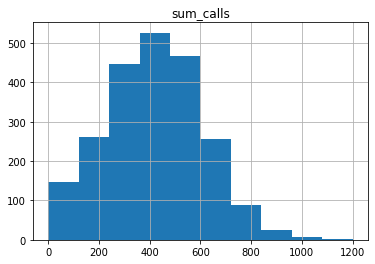

In [63]:
data_smart.hist('sum_calls', bins=10, range = (0, 1200)) 

In [64]:
print(data_smart['sum_calls'].describe()) # вызываю метод describe()

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: sum_calls, dtype: float64


Помесячная длительность звонков  распределена нормально. Значения варируется от 0 до 1435 минут со срденим занчением 417.935 и стандартным отклонение 190.314. Наибольшее количество абонентов имеют длительность звонков в месяц примерно от 350 до 450 минут 

array([[<AxesSubplot:title={'center':'count_messages'}>]], dtype=object)

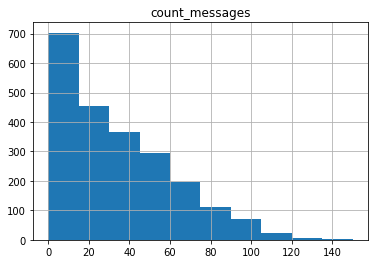

In [65]:
data_smart.hist('count_messages', bins=10, range = (0, 150)) 

In [66]:
print(data_smart['count_messages'].describe()) # вызываю метод describe()

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: count_messages, dtype: float64


Количество сообщений в месяц пользователей с тарифом смарт распределено по распределению Пуассона. Значения варируется от 0 до 143. В среднем пользователи отправляют 33 сообщения в месяц, а стандартное отклонение равно 28.228. Наибольшее количество абонентов отправляют примерно от 0 до 15 сообщений в месяц.

array([[<AxesSubplot:title={'center':'sum_internet'}>]], dtype=object)

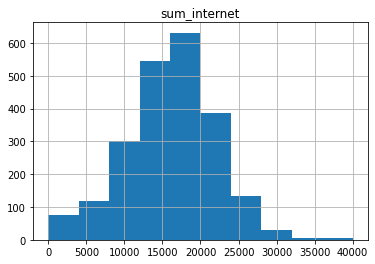

In [67]:
data_smart.hist('sum_internet', bins=10, range = (0, 40000))

In [68]:
print(data_smart['sum_internet'].describe()) # вызываю метод describe()

count     2229.000000
mean     16187.578735
std       5863.430302
min          0.000000
25%      12625.000000
50%      16482.000000
75%      20017.000000
max      38510.000000
Name: sum_internet, dtype: float64


Помесячный объём интернет трафика распределён нормально. Значения варируется от 0 до 38610 мегабайт со срденим занчением 16229 мегабайт и стандартным отклонение 5877.577. Наибольшее количество абонентов тарифа смарт потребляют примерно от 16 000 до 20 000 мегабайт трафика в месяц. 

**Тариф ultra**

In [69]:
data_ultra = data.query('tariff == "ultra"') # сделаем срез данных по тарифу ultra

In [70]:
mean_ultra_calls = data_ultra['sum_calls'].mean() # вычисляем среднее занчение для длительности звонков в месяц звонков по тарифу ultra
print(mean_ultra_calls)

526.6233502538071


In [71]:
mean_ultra_messages = data_ultra['count_messages'].mean() # вычисляем среднее занчение для количесвта сообщений в месяц по тарифу ultra
print(mean_ultra_messages)

49.36345177664975


In [72]:
mean_ultra_internet = data_ultra['sum_internet'].mean() # вычисляем среднее занчение для объема интернет трафика в месяц по тарифу ultra
print(mean_ultra_internet)

19450.643654822336


In [73]:
variance_ultra_calls = np.var(data_ultra['sum_calls'], ddof=1) # вычисляем дисперсию для длительности звонков в месяц звонков по тарифу ultra
print(variance_ultra_calls) 

100873.63339730098


In [74]:
variance_ultra_messages = np.var(data_ultra['count_messages'], ddof=1) # вычисляем дисперсию для количесвта сообщений в месяц по тарифу ultra
print(variance_ultra_messages) 

2285.2661425446736


In [75]:
variance_ultra_internet = np.var(data_ultra['sum_internet'], ddof=1) # вычисляем дисперсию для объема интернет трафика в месяц по тарифу ultra
print(variance_smart_internet) 
print(variance_ultra_internet) 

301.68556839699954
101566078.84341753


In [76]:
standard_ultra_calls = np.std(data_ultra['sum_calls'], ddof=1) # вычисляем стандартное отклонение для длительности звонков в месяц звонков по тарифу ultra
print(standard_ultra_calls)

317.6060978591264


In [77]:
standard_ultra_messages = np.std(data_ultra['count_messages'], ddof=1) # вычисляем стандартное отклонение для количесвта сообщений в месяц по тарифу ultra
print(standard_ultra_messages)

47.804457350174715


In [78]:
standard_ultra_internet = np.std(data_ultra['sum_internet'], ddof=1) # вычисляем стандартное отклонение для объема интернет трафика в месяц по тарифу ultra
print(standard_ultra_internet)

10077.999744166375


array([[<AxesSubplot:title={'center':'sum_calls'}>]], dtype=object)

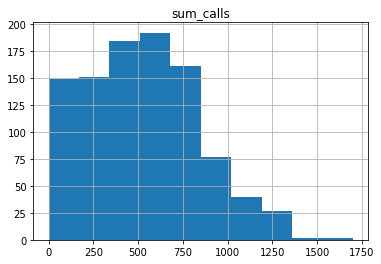

In [79]:
data_ultra.hist('sum_calls', bins=10, range = (0, 1700)) 

In [80]:
print(data_ultra['sum_calls'].describe()) # вызываю метод describe()

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: sum_calls, dtype: float64


В помесячная длительности звонков абонентов тарифа ультра значения варируется от 0 до 1673 минут со срденим занчением 526.623 и стандартным отклонение 317.606. Наибольшее количество абонентов имеют длительность звонков в месяц примерно от 500 до 650 минут

array([[<AxesSubplot:title={'center':'count_messages'}>]], dtype=object)

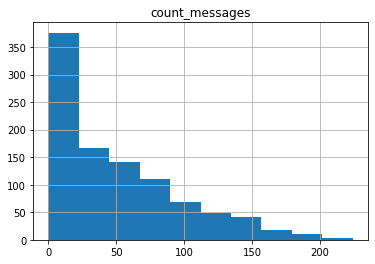

In [81]:
data_ultra.hist('count_messages', bins=10) 

In [82]:
print(data_ultra['count_messages'].describe()) # вызываю метод describe()

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: count_messages, dtype: float64


Количество сообщений в месяц пользователей с тарифом смарт распределено по распределению Пуассона. Значения варируется от 0 до 224. В среднем пользователи отправляют 49 сообщения в месяц, а стандартное отклонение равно 47.804. Наибольшее количество абонентов отправляют примерно от 0 до 20 сообщений в месяц.

array([[<AxesSubplot:title={'center':'sum_internet'}>]], dtype=object)

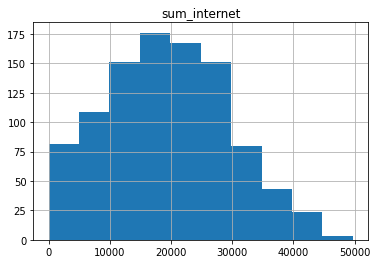

In [83]:
data_ultra.hist('sum_internet', bins=10) 

In [84]:
print(data_ultra['sum_internet'].describe()) # вызываю метод describe()

count      985.000000
mean     19450.643655
std      10077.999744
min          0.000000
25%      11762.000000
50%      19289.000000
75%      26810.000000
max      49701.000000
Name: sum_internet, dtype: float64


Помесячный объём интернет трафика пользователей тарифа ультра распределён нормально. Значения варируется от 0 до 49789 мегабайт со срденим занчением 19487 мегабайт и стандартным отклонение 10096.317. Наибольшее количество абонентов тарифа смарт потребляют примерно от 16 000 до 20 000 мегабайт трафика в месяц. 

**Вывод**

Абоненты тарифа ультра больше разговаривают по телефону, отправляют сообщений и пользуются интернетом. Это можно объяснить тем, что лимиты включенные в абонентскую плату тарифа ultra больше, чем тарифа smart

## Проверка гипотез

**Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются**

Проверим гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются с помщью t-теста

Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются
Альтернативная: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

In [85]:
ultra = data_ultra['income']

smart = data_smart['income']

alpha =  0.05 # критический уровень статистической значимости

results = st.ttest_ind(
    ultra, 
    smart) # проверим гипотезу о равенстве средних двух совокупностей

print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравниваем получившееся p-значение с заданным уровнем статистической значимости :
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.717446581911462e-162
Отвергаем нулевую гипотезу


In [86]:
ultra.mean()

2069.543147208122

Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно очень мала. Это явно слишком маленькая вероятность, можно сделать вывод о значимом различии между средними выручками пользователей тарифов «Ультра» и «Смарт». Знак p-значения говорит что выручка в тарифе «Ультра» больше.

**Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**

Проверим гипотезу о том, что cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов с помщью t-теста

In [87]:
data_moscow = data.query('city == "Москва"') # сделаем срез данных по городу Москва

In [88]:
data_other_regions = data.query('city != "Москва"') # сделаем срез данных по другим городам

In [89]:
moscow = data_moscow['income']

other_regions = data_other_regions['income']

alpha =  0.05 # критический уровень статистической значимости

results = st.ttest_ind(
    moscow, 
    other_regions) # проверим гипотезу о равенстве средних двух совокупностей

print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравниваем получившееся p-значение с заданным уровнем статистической значимости :
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5357407978453328
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно 53 %, хотя средняя выручка и не неодинакова. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними выручками Москвы и других городов.

**Вывод**

Удалось проверить необходимые гипотезы о том, что:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Сделал вывод о значимом различии между средними выручками пользователей тарифов «Ультра» и «Смарт» по первой гипотезе. По второй гипотезе сделал вывод о том, что вероятность получить такое или большее различие случайно слишком большая чтобы делать вывод о значимом различии между средними выручками Москвы и других городов.


## Общий вывод

В ходе исследования были изучены два тарифных плана.

Посчитано для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячная выручка с каждого пользователя.
- сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Среднее количество, дисперсия и стандартное отклонение. Построены гистограммы. Опишисаны распределения.

Проверены гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

А также дан ответ на вопрос какой тариф лучше. Оказалось, что средняя выручка, которую компания получает с тарифа "Ультра" больше, чем выручка с тарифа "Смарт", следовательно, для компании тариф "Ультра" выгоднее, то есть лучше.

Таким образом, были выполнены все задачи, поставленные перед началом исследования.